# Core functions

## Primer ejemplo
Importamos los paquetes *Dosepy* y *numpy* para crear matrices de ejemplo que representen dos distribuciones de dosis.

In [2]:
import Dosepy.dose as dp
import numpy as np

Generamos las matrices, A y B, con los valores 96 y 100 en todos sus elementos. 

In [3]:
A = np.zeros((10,10)) + 96   # Matriz de 10x10, 
B = np.zeros((10,10)) + 100
print(A)
print(B)

[[96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]
 [96. 96. 96. 96. 96. 96. 96. 96. 96. 96.]]
[[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]]


Para generar las distribuciones de dosis, solamenta hace falta indicar la resolución espacial. En Dosepy, la unidad para la dosis es el Gray (Gy) y para la distancia se utiliza el milímetro (mm). Asumiendo una resolución de 1 mm, y a las matrices A y B como distribución de referencia y distribución a evaluar, ejecutamos los siguientes comandos:

In [4]:
D_ref = dp.Dose(A, 1)   # Se define la distribución de dosis de referencia
D_eval = dp.Dose(B, 1)  # Se define la distribución de dosis a evaluar

La comparación gamma entre dos distribuciones de dosis se realiza mediante el método *gamma2D*. Como argumentos se requiere:
* La distribución de dosis de referencia
* El porcentaje de tolerancia para la diferencia en dosis.
* La distancia de tolerancia o criterio DTA en mm.

Sobre la variable D_eval, aplicamos el método gamma2D proporcionando como argumentos la distribución de referencia, D_ref, y el criterio (3 %, 1 mm). Asignamos el resultado a las variables siguientes:

In [5]:
gamma_distribution, pass_rate = D_eval.gamma2D( D_ref, 3, 1) 

print(f"El porcentaje de aporbación es: {pass_rate:.1f} %")

Dosis máxima: 100.0
Umbral de dosis: 10.0
El porcentaje de aporbación es: 0.0 %


De forma predeterminada en el algoritmo interno de Dosepy,  el porcentaje de aprobación (3 % en el ejemplo anterior) se considera relativo al máximo de la distribución de dosis a **evaluar**. Para cambiar esta opción y referenciar el porcentaje a la dosis local, llamamos al método gamma2D con un argumento extra, local_norm.

In [6]:
gamma_distribution, pass_rate = D_eval.gamma2D( D_ref, 3, 1, local_norm = True) 

print(f"El porcentaje de aporbación es: {pass_rate:.1f} %")

Dosis máxima: 100.0
Umbral de dosis: 10.0
El porcentaje de aporbación es: 0.0 %


Dado que **todos** los valores de las matrices A y B difieren en un 4 % entre sí, el resultado es 0 para el índice de aprobación en las dos comparaciones previas.

# Segundo ejemplo
## Uso de archivos CSV y un umbral de dosis para la comparación

En Dosepy es posible cargar archivos de datos en fromato CSV (comma separate values) mediante la función from_csv. 
> **Notas:** 
>* El archivo deberá contener sólo los valores de dosis.
>* De contener información adicional, ésta deberá estar precedida con el carácter “#”. Ello indicará que todos los caracteres que se encuentren en la misma linea después de “#” debe de ser ignorados por Dosepy.
>* La unidad para la dosis deberá ser el Gray (Gy).

Para cargar los archivos y crear las distribuciones de dosis, llamamos a la función from_csv, indicando el nombre del archivo y la resolución espacial asociada.

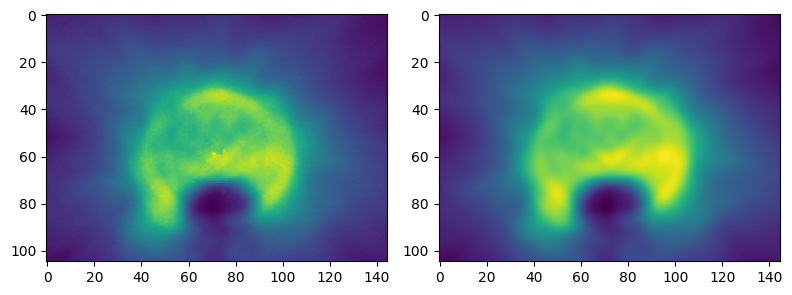

In [7]:
D_film = dp.from_csv('../Jupyter/D_FILM.csv', 1)
D_tps = dp.from_csv('../Jupyter/D_TPS.csv', 1)

#---------------------------------------------
#   Código para visualizar las distribuciones de dosis
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(D_film.array)
ax[1].imshow(D_tps.array)
fig.tight_layout()
plt.show()
#---------------------------------------------

Sobre la distribución D_tps, llamamos al método gamma2D, con criterio 3 %, 2 mm, descartando todos aquellos puntos con una dosis por debajo del 10 % (dose_tresh = 10). Para la comparación, se utilizará D_film como distribución de referencia y D_tps como distribución a evaluar. Se acota la región de busqueda a un radio de 4 mm. 

In [10]:

g, pass_rate = D_tps.gamma2D(D_film, 3, 2, dose_tresh = 10, mask_radius = 3)

#---------------------------------------------
#   Imprimimos el resultado
print(f'El índice de aprobación es: {pass_rate:.1f} %')
#---------------------------------------------


Dosis máxima: 8.5
Umbral de dosis: 0.9
El índice de aprobación es: 98.9 %


In [ ]:
#---------------------------------------------
#   Graficamos el resultado

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
ax = axes.ravel()

ax[0].set_title('Distribución gamma', fontsize = 11)
ax[0].imshow(g, vmax = 1.4)

ax[1].set_title('Histograma gamma', fontsize = 11)
ax[1].grid(alpha = 0.3)
ax[1].hist( g[~np.isnan(g)] , bins = 50, range = (0,3), alpha = 0.7, log= True)

plt.show()